In [65]:
import pandas as pd
import matplotlib as plt 
import seaborn as snb 

In [33]:
dados_df = pd.read_csv('gastos-deputados.csv', sep = ';')
dados_df = dados_df.drop_duplicates(subset ="txNomeParlamentar")
dados_df

,txNomeParlamentar,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,AVANTE,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,...,6,2019,0,NaN,NaN,1609131,NaN,NaN,3175,6862742
21,CIDADANIA,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,...,5,2019,0,NaN,NaN,1604085,NaN,NaN,3453,6849871
37,DEM,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,...,7,2019,0,NaN,NaN,1620572,NaN,NaN,2713,6890225
42,LID.GOV-CD,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,...,1,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121
53,LIDERANÇA DO PSDB,NaN,NaN,2019,NaN,NaN,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,6,2019,0,NaN,NaN,1601260,NaN,NaN,2442,6844320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144605,REINHOLD STEPHANES JUNIOR,205865.0,528.0,2019,PR,PSD,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,3,2019,0,NaN,NaN,1582842,NaN,NaN,3438,6802048
145051,TED CONTI,206231.0,531.0,2019,ES,PSB,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2,2019,0,NaN,NaN,1581783,NaN,NaN,3444,6799279
145189,BIA CAVASSA,207176.0,532.0,2019,MS,PSDB,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,5,2019,0,NaN,NaN,1596029,NaN,NaN,3445,6832984
145383,ENÉIAS REIS,207309.0,533.0,2019,MG,PSL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,7,2019,0,NaN,NaN,1616509,NaN,NaN,3446,6880253


In [47]:
qte_dep_uf = dados_df.groupby('sgUF', as_index = False).count()[['ideDocumento', 'sgUF']]
qte_dep_uf

,ideDocumento,sgUF
0,14,AC
1,14,AL
2,14,AM
3,13,AP
4,55,BA
5,35,CE
6,15,DF
7,16,ES
8,27,GO
9,31,MA


In [48]:
!pip install altair

In [49]:
import altair as alt

In [107]:
alt.Chart(qte_dep_uf, title = "Qte de deputados por UF").mark_bar().encode(
    x= alt.X('sgUF', title ='Estado'),
    y= alt.Y('ideDocumento', title ='Quantidade de deputados'),
    color = alt.Color('sgUF', legend=None)
    
    ).interactive()

alt.Chart(...)

In [136]:
qtd_candidatos_partido = dados_df[['ideDocumento' , 'sgPartido']].groupby('sgPartido', as_index=False).count()
qtd_candidatos_partido

,sgPartido,ideDocumento
0,AVANTE,11
1,CIDADANIA,8
2,DEM,54
3,MDB,63
4,NOVO,8
5,PATRI,5
6,PATRIOTA,4
7,PCdoB,13
8,PDT,37
9,PHS,7


In [124]:
alt.Chart(qtd_candidatos_partido, title = "Qte de deputados por partido").mark_bar().encode(
    x= alt.X('sgPartido', title ='Partido'),
    y= alt.Y('ideDocumento', title ='Quantidade de deputados'),
    color = alt.Color('sgPartido')
    
    ).interactive()

alt.Chart(...)

In [145]:
#snb.countplot(y='nuLegislatura', data=dados_df, hue='nuLegislatura')
dep_partido_pre = (dados_df['nuLegislatura'] < 2016)
dep_partido_pre = dados_df[dep_partido_pre]
dep_partido_pre = dep_partido_pre[['ideDocumento' , 'sgPartido']].groupby(
    'sgPartido', as_index=False
).count().sort_values('ideDocumento', ascending=False)
dep_partido_pre

,sgPartido,ideDocumento
22,PT,65
10,PP,57
2,MDB,54
19,PSDB,49
1,DEM,44
18,PSD,42
16,PSB,30
6,PDT,25
14,PRB,21
20,PSL,20


In [148]:
alt.Chart(dep_partido_pre, title = "Qte de deputados por partido antes de 2016").mark_bar().encode(
    x= alt.X('sgPartido', title ='Partido'),
    y= alt.Y('ideDocumento', title ='Quantidade de deputados'),
    color = alt.Color('sgPartido')
    ).interactive()

alt.Chart(...)

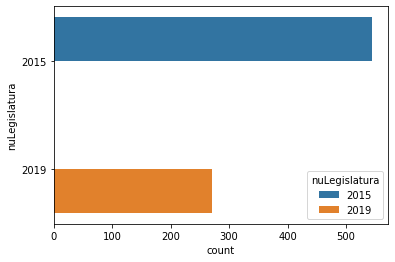

In [146]:
snb.countplot(y='nuLegislatura', data=dados_df, hue='nuLegislatura')

In [147]:
contagem_vlr_documento_estados = dados_df.groupby('sgUF').count()[['vlrDocumento']]
contagem_vlr_documento_estados.sort_values('vlrDocumento', ascending=False).head()


,vlrDocumento
sgUF,
SP,102
MG,80
RJ,78
BA,55
RS,46
